Create a simple RNN model for generating data using text and predict the 
text using a pre-trained model.(Use ReLU and Softmax activation function). 
(Use shakespeare.txt file) 

In [ ]:
# SET A Q1.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
from google.colab import files
uploaded = files.upload()


# Load and preprocess the text
with open('shakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Explore the text file
print(f"Text file size: {len(text)} characters")
print("\nFirst 500 characters of the text:")
print(text[:500])

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences using n-gram technique
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# Pad sequences to the same length
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split into features and labels
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Build the RNN model
model = Sequential()
model.add(Embedding(total_words, 64))
model.add(SimpleRNN(150, activation='relu'))  # Using ReLU here
model.add(Dense(total_words, activation='softmax'))  # Using Softmax here

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model or load pre-trained
model_path = 'rnn_shakespeare.h5'
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Loaded pre-trained model.")
else:
    history = model.fit(xs, ys, epochs=30, verbose=1)
    model.save(model_path)
    print("Model trained and saved.")

model.summary()

# Function to generate text
def generate_text(seed_text, next_words=50):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        seed_text += " " + output_word
    return seed_text

# Example usage
print(generate_text("to be or not", next_words=20))

Saving shakespeare.txt to shakespeare.txt
Text file size: 5436475 characters

First 500 characters of the text:
  from fairest creatures we desire increase,
  that thereby beauty's rose might never die,
  but as the riper should by time decease,
  his tender heir might bear his memory:
  but thou contracted to thine own bright eyes,
  feed'st thy light's flame with self-substantial fuel,
  making a famine where abundance lies,
  thy self thy foe, to thy sweet self too cruel:
  thou that art now the world's fresh ornament,
  and only herald to the gaudy spring,
  within thine own bud buriest thy content,
 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 Write a python program to implement time series forecasting in Recurrent 
Neural network using LSTM module.( Use monthly_milk_production.csv) 

Saving monthly_milk_production.csv to monthly_milk_production (3).csv
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2452
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1411
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0287
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0330
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0316
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0271
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0221
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0232
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0201
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0187
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169
Epoch 16/100
8/8 ━━━━━━━━━━━━━━

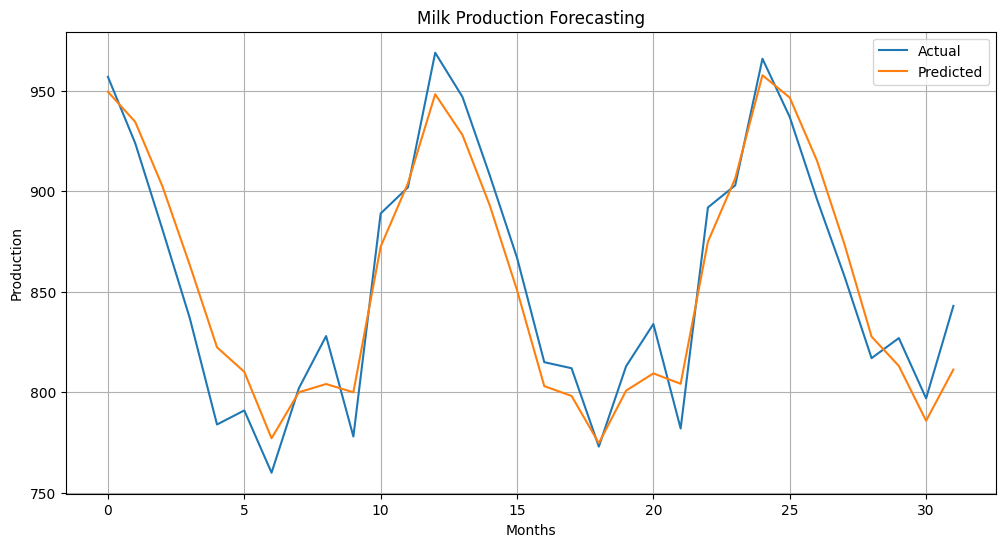

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


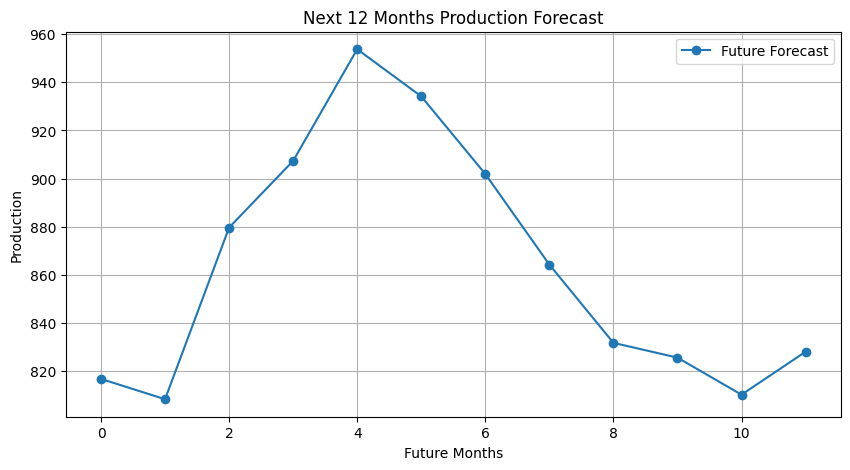

In [ ]:
#SET A Q2.
# Upload CSV file
from google.colab import files
uploaded = files.upload()

#Load the uploaded file
import pandas as pd
import io

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

#Validate and preprocess
if 'Date' not in df.columns or 'Production' not in df.columns:
    raise ValueError("CSV must contain 'Date' and 'Production' columns.")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Production']].dropna()

#Create sequences
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math
import matplotlib.pyplot as plt

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

#Forecasting pipeline
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

#Predict and evaluate
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"\n✅ RMSE on test data: {rmse:.2f}\n")

#Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Milk Production Forecasting')
plt.xlabel('Months')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

#Forecast next 12 months
last_sequence = scaled_data[-seq_length:]
future_preds = []
for _ in range(12):
    input_seq = last_sequence.reshape((1, seq_length, 1))
    next_pred = model.predict(input_seq)[0]
    future_preds.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [next_pred], axis=0)

future_preds_inv = scaler.inverse_transform(future_preds)

plt.figure(figsize=(10, 5))
plt.plot(future_preds_inv, marker='o', label='Future Forecast')
plt.title('Next 12 Months Production Forecast')
plt.xlabel('Future Months')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()



Write a python program to predict a stock price from a mastercard stock 
dataset using LSTM and GRU models. 

/tmp/ipython-input-3802781877.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price           Close       High        Low       Open   Volume
Ticker             MA         MA         MA         MA       MA
Date                                                           
2015-01-02  80.211411  81.784184  79.499916  81.147585  4505800
2015-01-05  77.955254  79.902498  77.749301  79.846330  6441400
2015-01-06  77.786736  78.432698  76.579077  78.320362  7690000
2015-01-07  78.996758  79.053034  77.918078  78.884197  5846800
2015-01-08  80.225487  80.309909  79.756496  79.906577  5174200
Training shape: (1763, 60, 1)
Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 0.0316 - val_loss: 0.0022
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 7.2270e-04 - val_loss: 0.0018
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.3253e-04 - val_loss: 0.0013
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 7.1804e-04 - val_loss: 0.0016
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 6.5246e-04 - val_loss: 0.0032
Epoch 6/20
56/56

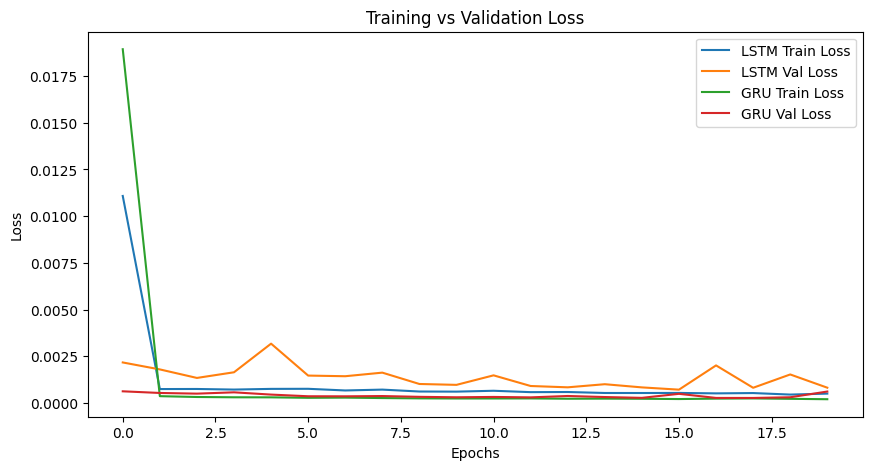

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


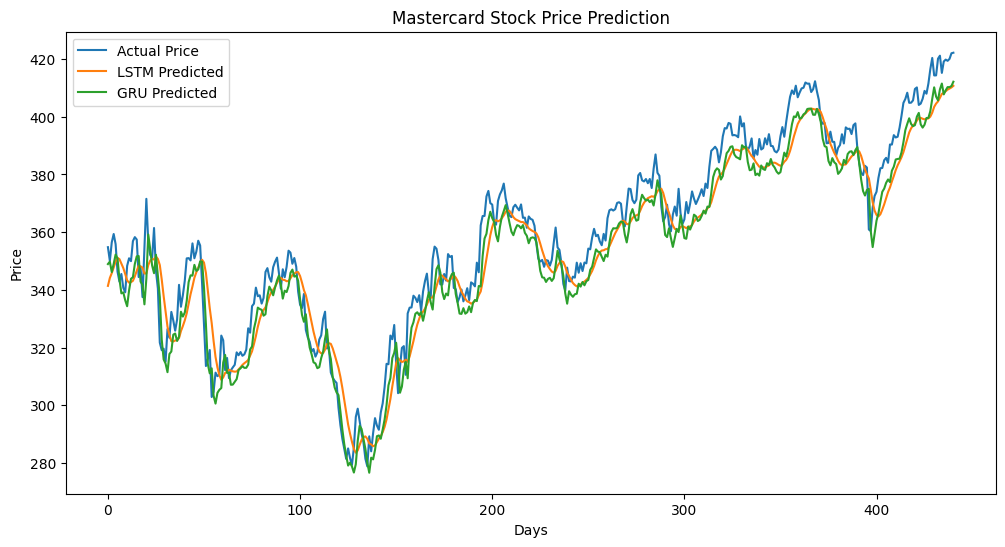

In [ ]:
# Set A Q3.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

ticker = "MA"
df = yf.download(ticker, start="2015-01-01", end="2023-12-31")

print(df.head())

# Use only the 'Close' price
data = df[["Close"]]

# 2. Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # last 60 days → predict next day
X, y = create_sequences(scaled_data, seq_length)

# Train-test split (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Training shape:", X_train.shape)

# 4. Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")


# 5. Train LSTM
history_lstm = lstm_model.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=20, batch_size=32)

# 6. Build GRU Model
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, 1)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer="adam", loss="mse")

# 7. Train GRU
history_gru = gru_model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=20, batch_size=32)

# 8. Plot Loss Curves
plt.figure(figsize=(10,5))
plt.plot(history_lstm.history["loss"], label="LSTM Train Loss")
plt.plot(history_lstm.history["val_loss"], label="LSTM Val Loss")
plt.plot(history_gru.history["loss"], label="GRU Train Loss")
plt.plot(history_gru.history["val_loss"], label="GRU Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 9. Predictions
y_pred_lstm = lstm_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)

# Inverse transform predictions
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_pred_gru = scaler.inverse_transform(y_pred_gru)
y_test_inv = scaler.inverse_transform(y_test)

# 10. Plot Results
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label="Actual Price")
plt.plot(y_pred_lstm, label="LSTM Predicted")
plt.plot(y_pred_gru, label="GRU Predicted")
plt.title("Mastercard Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Write a python program to create a sequential model that processes 
sequences of integers, embeds each integer into a 64-dimensional vector, and 
then process the sequence of vectors using a LSTM layer. 

In [ ]:
#Set A Q4.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# dummy integer sequence data
vocab_size = 5000
maxlen = 100        # length of each sequence

# Create random training data (1000 samples of sequences)
X_train = np.random.randint(1, vocab_size, size=(1000, maxlen))
y_train = np.random.randint(0, 2, size=(1000, 1))  # binary labels

#  Build Sequential Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation="sigmoid")
])


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.4852 - loss: 0.6931 - val_accuracy: 0.5350 - val_loss: 0.6915
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5494 - loss: 0.6729 - val_accuracy: 0.5650 - val_loss: 0.6904
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9714 - loss: 0.5019 - val_accuracy: 0.4850 - val_loss: 0.7147


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 100, 64)          │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (32, 64)               │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,269 (4.04 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 706,180 (2.69 MB)